# Polynomial Regression with Library
## Import some library that we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import PolynomialFeatures # pip install scikit-learn

/home/mllab/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Initialize the data

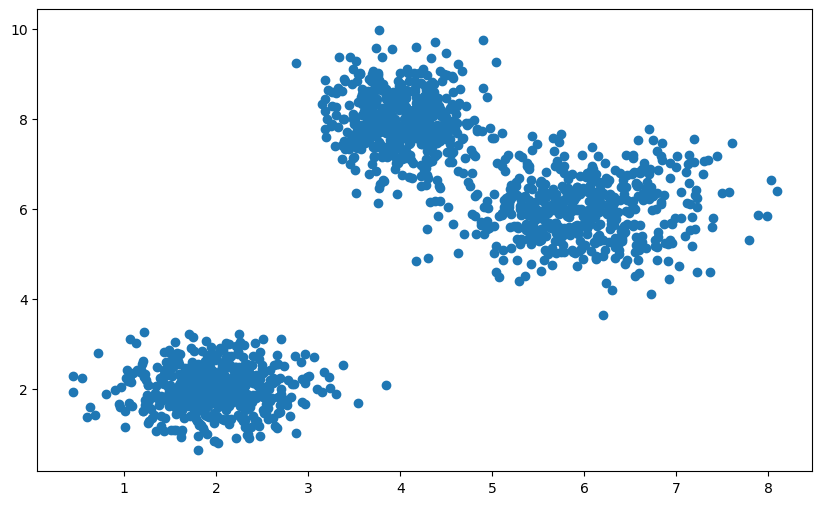

In [2]:
# Number of data points in each cluster
num_points = 500

# Generate data for three clusters
cluster1 = np.random.normal(loc=[2, 2], scale=[0.5, 0.5], size=(num_points, 2))
cluster2 = np.random.normal(loc=[6, 6], scale=[0.7, 0.7], size=(num_points, 2))
cluster3 = np.random.normal(loc=[4, 8], scale=[0.4, 0.6], size=(num_points, 2))

# Combine the clusters
x = np.concatenate((cluster1[:, 0], cluster2[:, 0], cluster3[:, 0]))
y = np.concatenate((cluster1[:, 1], cluster2[:, 1], cluster3[:, 1]))

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

## Create the polynomial features

Here we use the PolynomialFeatures function to create the polynomial features of the data. 

If we set the degree to 1, it will be the same as the linear regression.

[sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [3]:
degree = 1
poly = PolynomialFeatures(degree=degree, include_bias=True)

In [4]:
poly_features = poly.fit_transform(x.reshape(-1, 1)) # x.reshape(-1, 1) is a 2D array with one column

## Create the model

Based on the polynomial features, we can create the model. And we can use the model to fit the data. 

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Get `y_pred` from the model with predict function.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [7]:
y_predicted = poly_reg_model.predict(poly_features)

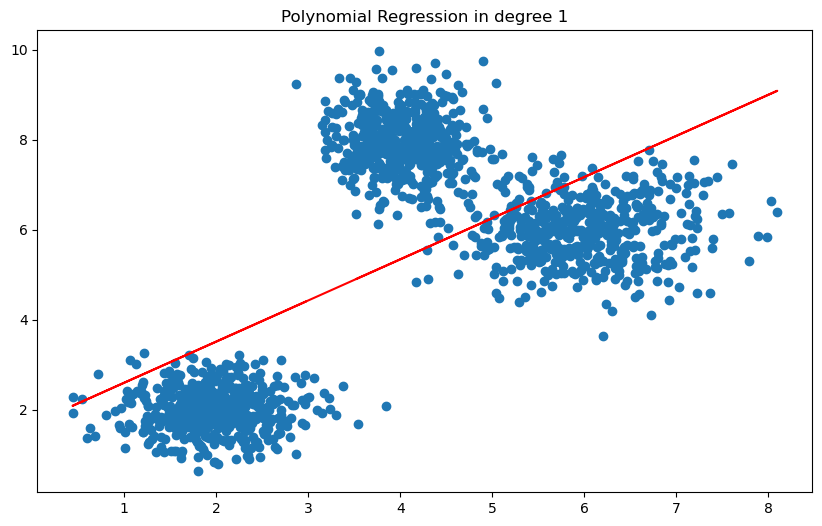

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression in degree {}".format(degree))
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

## Calculate the accuracy and the loss (MSE and MAE)

We can use the `sklearn.linear_model` to calculate the accuracy.

We can use the `sklearn.metrics` to calculate the loss.

[sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

[sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [9]:
# calculate loss, MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Accuracy: ", poly_reg_model.score(poly_features, y))
print("MSE: ", mean_squared_error(y, y_predicted))
print("MAE: ", mean_absolute_error(y, y_predicted))

Accuracy:  0.3770748813271505
MSE:  4.092465875195728
MAE:  1.791307625621191
